Detalles Importantes
- Preprocesamiento de Datos: Es esencial normalizar los datos para que la RNN pueda procesarlos adecuadamente.
- Construcción del Modelo: Un modelo básico de LSTM con Dropout para prevenir el overfitting.
- Entrenamiento: Utiliza un conjunto de entrenamiento para ajustar los parámetros del modelo.
- Predicción: Genera predicciones sobre el conjunto de datos y grafica los resultados para compararlos con los valores reales.
- Este flujo puede ser ajustado según las necesidades específicas del análisis, incluyendo el ajuste de hiperparámetros, la división en conjuntos de entrenamiento y prueba, y la evaluación del rendimiento del modelo.

## 1. Introducción

En el video anterior vimos las fases involucradas en el análisis exploratorio y la preparación del set de datos requeridas en la implementación de los modelos LSTM para pronosticar el comportamiento de la serie de tiempo.



La idea es predecir el comportamiento de la temperatura una hora a futuro (de ahí el término unistep) usando como entrada al modelo sólo el registro histórico de la temperatura (de ahí el término univariado).

**Identificación Única: Cada acción cotizada tiene un símbolo único. AAPL identifica específicamente a Apple Inc. Otros ejemplos incluyen GOOGL para Alphabet Inc. (Google) y MSFT para Microsoft.

Yahoo Finance es un servicio en línea que proporciona información financiera, incluyendo datos de cotizaciones bursátiles, noticias financieras, informes, e información de mercado en tiempo real. Ofrece datos históricos de precios, que son fundamentales para análisis financieros, como predicción de precios de acciones utilizando modelos de Machine Learning.

##2. El set de datos

Recordemos que estamos usando el  [weather dataset](https://www.bgc-jena.mpg.de/wetter/weather_data.html), un set de datos que contiene el registro histórico de 14 diferentes variables climáticas en el período entre 2009 y 2015.

Pasos previos

1. Hicimos el manejo de datos faltantes
2. Verificamos que el dataset no tuviese valores extremos
3. Re-interpolamos el dataset para garantizar una periodicidad de 1 hora

##3. El problema a resolver

Crear y entrenar una Red LSTM usando el enfoque univariado + single-step:


**Uso de Yahoo Finance en Modelos Predictivos**

Para construir un modelo predictivo de precios de acciones, necesitaremos datos históricos como precios de cierre, volúmenes de negociación, etc. Yahoo Finance proporciona estos datos a través de su API y su integración con Python a través de la librería yfinance.

**Componentes Clave del Dataset de Yahoo Finance:**

- Precio de Apertura (Open): Precio al que una acción abre al comienzo del día de trading.
- Precio de Cierre (Close): Precio al que una acción cierra al final del día de trading.
- Precio Máximo (High): Precio más alto alcanzado durante el día de trading.
- Precio Mínimo (Low): Precio más bajo alcanzado durante el día de trading.
- Volumen (Volume): Número total de acciones negociadas durante el día.
- Precio de Cierre Ajustado (Adj Close): Precio de cierre ajustado por dividendos y splits.

**Instalación de Librerías Necesarias**

Necesitaremos varias librerías de Python, incluyendo yfinance, numpy, pandas, matplotlib, y tensorflow.

In [ ]:
# prompt: pip install yfinance numpy pandas matplotlib tensorflow

!pip install yfinance numpy pandas matplotlib tensorflow


**Descarga de Datos de Yahoo Finance**

La librería yfinance facilita la descarga de estos datos históricos directamente en un DataFrame de pandas, que puede ser manipulado y utilizado para construir modelos predictivos.<br>
Vamos a seleccionar una acción, por ejemplo, Apple Inc. (AAPL), y descargaremos los datos históricos.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
import yfinance as yf
import pandas as pd

# Specify the tickers or symbols for the financial instruments you want to download
tickers = ["AAPL", "GOOG", "MSFT"]

# Download data for the specified tickers
data = yf.download(tickers)

# Show the first few records of the downloaded data
data.head(5)

[*********************100%%**********************]  3 of 3 completed


Price      Adj Close               Close                High            \
Ticker          AAPL GOOG MSFT      AAPL GOOG MSFT      AAPL GOOG MSFT   
Date                                                                     
1980-12-12  0.099192  NaN  NaN  0.128348  NaN  NaN  0.128906  NaN  NaN   
1980-12-15  0.094017  NaN  NaN  0.121652  NaN  NaN  0.122210  NaN  NaN   
1980-12-16  0.087117  NaN  NaN  0.112723  NaN  NaN  0.113281  NaN  NaN   
1980-12-17  0.089273  NaN  NaN  0.115513  NaN  NaN  0.116071  NaN  NaN   
1980-12-18  0.091861  NaN  NaN  0.118862  NaN  NaN  0.119420  NaN  NaN   

Price            Low                Open               Volume            
Ticker          AAPL GOOG MSFT      AAPL GOOG MSFT       AAPL GOOG MSFT  
Date                                                                     
1980-12-12  0.128348  NaN  NaN  0.128348  NaN  NaN  469033600  NaN  NaN  
1980-12-15  0.121652  NaN  NaN  0.122210  NaN  NaN  175884800  NaN  NaN  
1980-12-16  0.112723  NaN  NaN  0.113281  NaN  NaN  105728000  NaN  NaN  
1980-12-17  0.115513  NaN  NaN  0.115513  NaN  NaN   86441600  NaN  NaN  
1980-12-18  0.118862  NaN  NaN  0.118862  NaN  NaN   73449600  NaN  NaN

In [31]:
import yfinance as yf

# Descargar datos de AAPL
ticker = 'AAPL'
#(ORIGINAL)data = yf.download(ticker, start='2010-01-01', end='2023-01-01')
data = yf.download(ticker)
# Mostrar las primeras filas
data.head(10)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099192,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094017,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087117,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089273,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091861,73449600
1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097467,48630400
1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102211,37363200
1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106524,46950400
1980-12-24,0.145089,0.145647,0.145089,0.145089,0.112130,48003200


In [32]:
data.shape

(10971, 6)

El dataset original tiene 6 variables y 10971 registros

In [33]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Seleccionar la Columna de Precio de Cierre
- Nos enfocamos en la columna 'Close' que representa el precio de cierre de la acción.

In [34]:
# Seleccionar la columna de precio de cierre
precio_cierre = data['Close']

# Mostrar las primeras filas del precio de cierre
print(precio_cierre.head())


Date
1980-12-12    0.128348
1980-12-15    0.121652
1980-12-16    0.112723
1980-12-17    0.115513
1980-12-18    0.118862
Name: Close, dtype: float64


**Preprocesamiento de Datos**

El preprocesamiento incluirá la normalización de los datos y la creación de secuencias temporales adecuadas para el modelo RNN.
<br>  mio

**Pre-procesamiento**
Implica:

- Partición en train/val/test (80%, 10%, 10%)
- Generación del dataset supervisado: entrada y salida del modelo
- Escalamiento

### 5.1. Partición del set en entrenamiento, validación y prueba

A diferencia de otros modelos de Machine Learning, en el caso de series de tiempo **se debe garantizar que se generan las particiones sin mezclar aleatoriamente los datos**.

Recordemos además que:
- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

In [7]:
#import numpy as np
#import pandas as pd
#from sklearn.preprocessing import MinMaxScaler

# Normalización de los datos de cierre

#scaler = MinMaxScaler(feature_range=(0, 1))
#data_scaled = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Mostrar las primeras filas de los datos normalizados
#print(data_scaled[:5])



[[0.0003658 ]
 [0.00033489]
 [0.00029367]
 [0.00030655]
 [0.00032201]]


4. Crear Secuencias de Tiempo para Entrenamiento
- Creamos secuencias de tiempo a partir de los datos normalizados para usar como entrada en el modelo RNN. Definimos una ventana de tiempo (sequence_length) para generar las secuencias.

In [39]:
# Función para dividir la serie de tiempo en entrenamiento, validación y prueba
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1):

    # Validar que los tamaños sumen 1
    assert tr_size + vl_size + ts_size == 1, "La suma de los tamaños de los conjuntos debe ser igual a 1."

    # Definir el número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size * N)
    Nval = int(vl_size * N)
    Ntst = N - Ntrain - Nval

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain + Nval]
    test = serie[Ntrain + Nval:]

    return train, val, test


# Prueba de la función

tr, vl, ts = train_val_test_split(data['Close'])

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')


Tamaño set de entrenamiento: (8776,)
Tamaño set de validación: (1097,)
Tamaño set de prueba: (1098,)


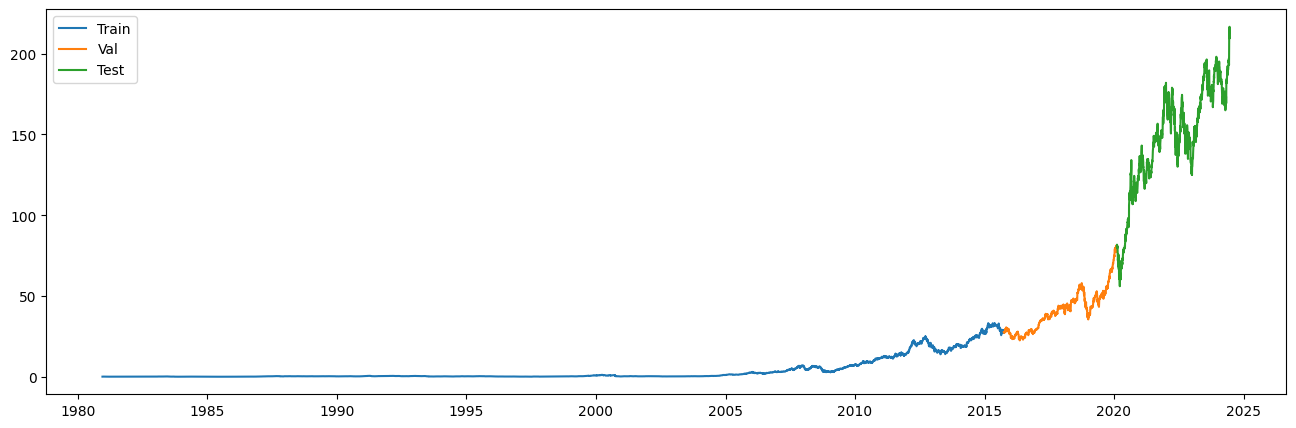

In [40]:
# Dibujemos los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr, label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

Observemos que por ser un modelo univariado sólo estamos preservando la variable temperatura (y que incluso hemos eliminado la información de fecha y hora de cada registro).

###5.2 Generación del dataset supervisado (entrada y salida del modelo)

Debemos ajustar nuestro set de datos de acuerdo a lo especificado en la [documentación de las Redes LSTM en TensorFlow/Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM):


Así que en este caso cada dato de entrenamiento será:

- Un arreglo de 24 (horas) x 1 (feature) correspondiente a la entrada
- Un arreglo de 1 (hora) x 1 (feature) correspondiente a la hora 25 (a predecir):


Crearemos una función que podremos reutilizar más adelante para implementar modelos más complejos:

In [41]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si tenemos sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)

    return X, np.array(Y)

In [42]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 1    # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (8751, 24, 1), y_tr: (8751, 1, 1)
Set de validación - x_vl: (1072, 24, 1), y_vl: (1072, 1, 1)
Set de prueba - x_ts: (1073, 24, 1), y_ts: (1073, 1, 1)


INPUT_LENGTH: Este parámetro define la longitud de la secuencia de entrada que se utiliza para predecir la siguiente salida. En otras palabras, especifica cuántos pasos de tiempo anteriores se consideran para hacer una predicción en cada punto de tiempo. En tu caso,

- INPUT_LENGTH = 24 significa que estás utilizando las últimas 24 observaciones (en tu caso, precios de cierre) para predecir el siguiente valor.

OUTPUT_LENGTH: Este parámetro indica cuántos pasos de tiempo hacia adelante deseas predecir. En tu configuración actual,

- OUTPUT_LENGTH = 1 significa que estás realizando predicciones de un solo paso en el tiempo. Esto implica que el modelo predice el valor de la siguiente observación (el siguiente precio de cierre) basado en las 24 observaciones previas.

OUTPUT_LENGTH = 1: Para un modelo de predicción unipaso, donde solo se predice el siguiente valor en la secuencia, OUTPUT_LENGTH = 1 es apropiado.

###5.3 Escalamiento

Es requerido para garantizar que todas las características se encuentran en el mismo rango de valores, lo que facilita el entrenamiento del modelo y las predicciones:

In [43]:
from sklearn.preprocessing import MinMaxScaler

def escalar_dataset(data_input):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})

    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    NFEATS = data_input['x_tr'].shape[2]


    # Generar listado con "scalers" (en este caso, por ser sólo 1 característica
    # se tendrá sólo 1 escalador)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

# Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs: en este caso debemos garantizar que cada dato de entrada
    # a fit_transform o transform debe ser de tamaño nsamples x nfeatures
    # (en este caso 24x13)
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [44]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler = escalar_dataset(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificación
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')

Min x_tr/x_vl/x_ts sin escalamiento: 0.04910700023174286/22.584999084472656/56.092498779296875
Min x_tr/x_vl/x_ts con escalamiento: -1.0/0.3575473457535143/2.3760171317956007

Min y_tr/y_vl/y_ts sin escalamiento: 0.04910700023174286/22.584999084472656/56.092498779296875
Min y_tr/y_vl/y_ts con escalamiento: -1.0/0.3575473457535143/2.3760171317956007

Max x_tr/x_vl/x_ts sin escalamiento: 33.25/81.08499908447266/216.6699981689453
Max x_tr/x_vl/x_ts con escalamiento: 1.0/3.881548944168854/12.049100285960717

Max y_tr/y_vl/y_ts sin escalamiento: 33.25/81.30249786376953/216.6699981689453
Max y_tr/y_vl/y_ts con escalamiento: 1.0/3.894650927859377/12.049100285960717


##6. Creación y entrenamiento del modelo

- Entradas: arreglos *x* (batches x input-length  x features = batches x 24 x 1)
- Salidas: arreglos *y* (batches x output-length x features = batches x 1 x 1)

Usaremos la raíz cuadrada del error cuadrático medio (o RMSE por sus siglas en Inglés: *root mean square error*) como pérdida para entrenar el modelo:


In [45]:
# Creación del modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 1 (feature)

modelo = Sequential()
modelo.add(LSTM(N_UNITS, input_shape=INPUT_SHAPE))
modelo.add(Dense(OUTPUT_LENGTH, activation='linear')) # activation = 'linear' pues queremos pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

In [46]:

# Compilación
optimizador = RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

In [47]:

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80  # Hiperparámetro
BATCH_SIZE = 256  # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/80
35/35 - 5s - loss: 0.8357 - val_loss: 1.3947 - 5s/epoch - 156ms/step
Epoch 2/80
35/35 - 4s - loss: 0.5933 - val_loss: 1.1778 - 4s/epoch - 112ms/step
Epoch 3/80
35/35 - 4s - loss: 0.2674 - val_loss: 0.9560 - 4s/epoch - 102ms/step
Epoch 4/80
35/35 - 3s - loss: 0.0849 - val_loss: 0.8142 - 3s/epoch - 84ms/step
Epoch 5/80
35/35 - 3s - loss: 0.0598 - val_loss: 0.6366 - 3s/epoch - 85ms/step
Epoch 6/80
35/35 - 4s - loss: 0.0367 - val_loss: 0.4778 - 4s/epoch - 103ms/step
Epoch 7/80
35/35 - 4s - loss: 0.0248 - val_loss: 0.4015 - 4s/epoch - 122ms/step
Epoch 8/80
35/35 - 4s - loss: 0.0232 - val_loss: 0.3955 - 4s/epoch - 110ms/step
Epoch 9/80
35/35 - 3s - loss: 0.0228 - val_loss: 0.3850 - 3s/epoch - 84ms/step
Epoch 10/80
35/35 - 4s - loss: 0.0226 - val_loss: 0.3746 - 4s/epoch - 121ms/step
Epoch 11/80
35/35 - 3s - loss: 0.0224 - val_loss: 0.3632 - 3s/epoch - 91ms/step
Epoch 12/80
35/35 - 3s - loss: 0.0222 - val_loss: 0.3565 - 3s/epoch - 85ms/step
Epoch 13/80
35/35 - 3s - loss: 0.0218 - va

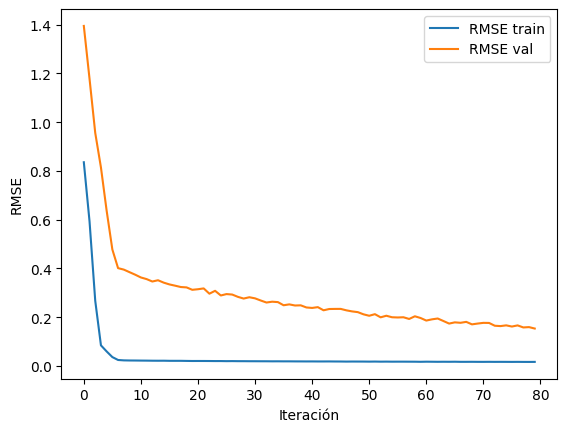

In [48]:
 # Graficar curvas de entrenamiento y validación
 # para verificar que no existe overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend();

**Observaciones y sugerencias:**

- El modelo no tiene *overfitting*
- Se sugiere afinar el modelo modificando varios de sus hiperparámetros y usando técnicas como, por ejemplo, *random grid search*. Los hiperparámetros a afinar pueden ser:
  - *INPUT_LENGTH* (esto implica modificar la fase de pre-procesamiento)
  - Número de unidades de la Red LSTM
  - Pérdida
  - Tasa de aprendizaje
  - Epochs
  - Batch size

## 7. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, verificaremos su desempeño para el set de prueba y lo compararemos con el desempeño obtenido con los sets de entrenamiento y validación.

Este desempeño es simplemente el RMSE obtenido con cada subset:

In [49]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.014
  RMSE val:	 0.143
  RMSE test:	 4.833


Los desempeños son comparables lo cual quiere decir que el modelo generaliza bastante bien.

##8. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

Creemos primero una función para generar las predicciones:

In [50]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [51]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

Analicemos este desempeño gráficamente mostrando los precios de cierre('Close') originales y las predichas por el modelo para cada uno de los 4.998 datos en el set de prueba:

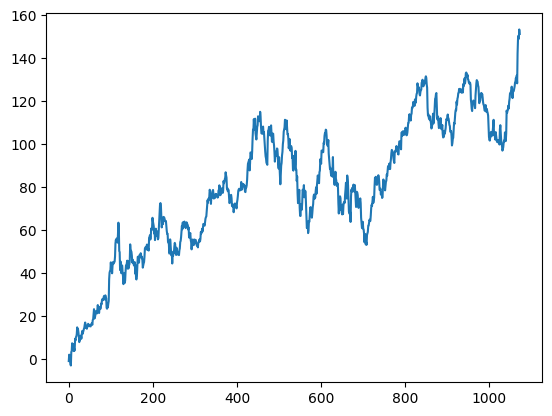

In [52]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores);

Se observa que:

- El promedio de errores es cercano a cero
- Pero en algunos instantes de tiempo se alcanzan errores extremos de hasta -6 y +4 grados.

Estos errores se podrían reducir al hacer una afinación del modelo o modificando el enfoque de predicción.

Se observa que:

- El promedio de errores es cercano a cero
- Pero en algunos instantes de tiempo se alcanzan errores extremos de hasta -6 y +4 grados.

Estos errores se podrían reducir al hacer una afinación del modelo o modificando el enfoque de predicción.

--------------------------------------------------------------------------------------------

In [9]:
# Definir el tamaño de la ventana de tiempo
sequence_length = 60

# Inicializar listas para las secuencias
X = []
y = []

# Crear secuencias de datos
for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])

# Convertir listas a arrays numpy
X, y = np.array(X), np.array(y)

# Reshape para RNN
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Mostrar la forma de los datos
print("Forma de X:", X.shape)
print("Forma de y:", y.shape)


Forma de X: (10911, 60, 1)
Forma de y: (10911,)


** Construcción del Modelo RNN**

Utilizaremos Keras para construir una RNN básica con capas LSTM (Long Short-Term Memory).

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Entrenamiento del Modelo**

Entrenaremos el modelo utilizando los datos de entrenamiento

In [ ]:
model.fit(X, y, epochs=100, batch_size=32)


Epoch 1/100
101/101 [==============================] - 10s 59ms/step - loss: 0.0065
Epoch 2/100
101/101 [==============================] - 5s 45ms/step - loss: 0.0017
Epoch 3/100
101/101 [==============================] - 6s 62ms/step - loss: 0.0014
Epoch 4/100
101/101 [==============================] - 5s 48ms/step - loss: 0.0014
Epoch 5/100
101/101 [==============================] - 5s 47ms/step - loss: 0.0014
Epoch 6/100
101/101 [==============================] - 6s 63ms/step - loss: 0.0013
Epoch 7/100
101/101 [==============================] - 5s 51ms/step - loss: 0.0011
Epoch 8/100
101/101 [==============================] - 6s 59ms/step - loss: 0.0012
Epoch 9/100
101/101 [==============================] - 6s 55ms/step - loss: 0.0012
Epoch 10/100
101/101 [==============================] - 5s 46ms/step - loss: 0.0011
Epoch 11/100
101/101 [==============================] - 8s 76ms/step - loss: 0.0011
Epoch 12/100
101/101 [==============================] - 11s 110ms/step - loss: 9.932

**Evaluación y Ajuste de Hiperparámetros**

Evaluaremos el modelo utilizando un conjunto de validación y ajustaremos los hiperparámetros según sea necesario, como el número de unidades LSTM, la tasa de dropout, el tamaño de lote, y el número de épocas.

** Generación de Predicciones**

Finalmente, generaremos predicciones y evaluaremos su precisión.

101/101 [==============================] - 1s 14ms/step


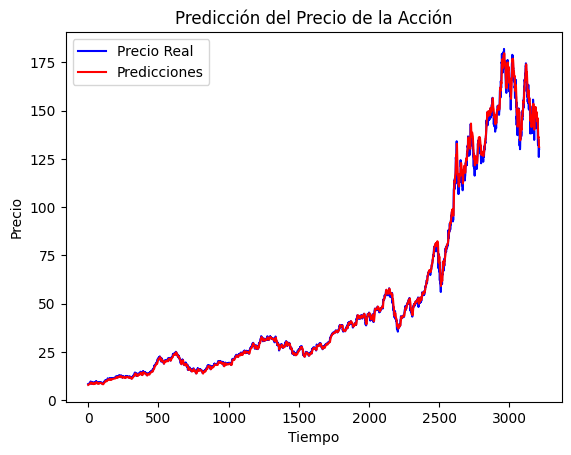

In [ ]:
# Predicciones
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# Comparar con los valores reales
real_values = scaler.inverse_transform(y.reshape(-1, 1))

import matplotlib.pyplot as plt

plt.plot(real_values, color='blue', label='Precio Real')
plt.plot(predictions, color='red', label='Predicciones')
plt.title('Predicción del Precio de la Acción')
plt.xlabel('Tiempo')
plt.ylabel('Precio')
plt.legend()
plt.show()


**Detalles Importantes**

- Preprocesamiento de Datos: Es esencial normalizar los datos para que la RNN pueda procesarlos adecuadamente.
- Construcción del Modelo: Un modelo básico de LSTM con Dropout para prevenir el overfitting.
- Entrenamiento: Utiliza un conjunto de entrenamiento para ajustar los parámetros del modelo.
- Predicción: Genera predicciones sobre el conjunto de datos y grafica los resultados para compararlos con los valores reales.
- Este flujo puede ser ajustado según las necesidades específicas del análisis, incluyendo el ajuste de hiperparámetros, la división en conjuntos de entrenamiento y prueba, y la evaluación del rendimiento del modelo.